In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **데이터 전처리**

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [3]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/qna_for_git.csv', index_col=0)

# df.head()

In [4]:
sub_type_mapping = {
    'type_1': 0,
    'type_2': 1,
    'type_3': 2,
    'type_4': 3,
    'type_5': 4,
    'type_6': 5,
    'type_7': 6,
    'type_8': 7,
    'type_9': 8,
    'type_10': 9,
    'type_11': 10,
    'type_12': 11,
    'type_13': 12,
    'type_14': 13,
    'type_15': 14,
    'type_16': 15,
    'type_17': 16,
    'type_18': 17,
    'type_19': 18,
    'type_20': 19,
    'type_21': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [5]:
df['sub_type'] = df['sub_type'].map(func)

In [6]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [7]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [8]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [9]:
print('훈련용 리뷰 개수 :', len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :', len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [ ]:
# train_data[:5] # 상위 5개 출력

In [ ]:
# test_data[:5]

In [10]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [ ]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

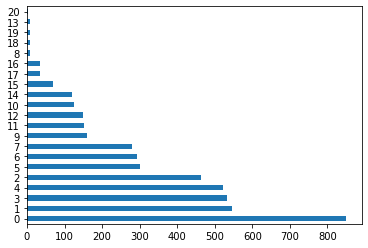

In [11]:
train_data['sub_type'].value_counts().plot(kind='barh')

In [12]:
print(train_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    849
1          1    545
2          2    464
3          3    532
4          4    521
5          5    300
6          6    293
7          7    280
8          8      9
9          9    160
10        10    125
11        11    153
12        12    150
13        13      8
14        14    121
15        15     70
16        16     34
17        17     36
18        18      8
19        19      8
20        20      2


In [13]:
print(test_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    209
1          1    130
2          2    119
3          3    140
4          4    121
5          5     89
6          6     75
7          7     68
8          8      2
9          9     20
10        10     33
11        11     37
12        12     49
13        13      5
14        14     21
15        15     20
16        16     12
17        17     12
18        18      2
19        19      2
20        20      2


In [14]:
print(train_data.isnull().values.any())

False


### **토크나이저를 이용한 정수 인코딩**
- 이미 학습해놓은 모델을 사용하다보면 (1)토크나이저, (2)모델 두 가지를 로드해야 한다.

In [15]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 29.9 MB/s 
     |████████████████████████████████| 596 kB 55.6 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 6.6 MB 56.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [16]:
import transformers

transformers.__version__

'4.20.1'

In [17]:
from transformers import BertTokenizerFast

# tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base") # 사용하고자 하는 모델 이름
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
# test_data = test_data.dropna(how='any')

print(len(test_data))

1168


In [19]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [20]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [21]:
print(X_train[0].tokens)

['[CLS]', 'ᄌ', '##ᅮ', '##ᄋ', '##ᅲ', '##ᄉ', '##ᅩ', '[UNK]', 'ᄒ', '##ᅪ', '##ᆨ', '##ᄋ', '##ᅵ', '##ᆫ', '##ᄋ', '##ᅳ', '##ᄅ', '##ᅩ', 'ᄋ', '##ᅵ', '##ᆫ', '##ᄋ', '##ᅵ', '##ᆸ', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [22]:
print(X_train[0].ids)

[101, 1464, 30014, 29999, 30016, 29997, 30011, 100, 1469, 30012, 30020, 29999, 30019, 30021, 29999, 30017, 29994, 30011, 1463, 30019, 30021, 29999, 30019, 30024, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

> `type_ids`: 풀고자 하는 문제에서 문장 종류의 개수를 의미
> - 일반적으로 2개 이상의 문장을 가지고 푸는 문제일 경우 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만
> - 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제이므로 [0, 0, 0, 0, 0, 0, 0, 0] 이 들어감


In [24]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **데이터셋 생성 및 모델 학습**

In [25]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [26]:
X_train

Output hidden; open in https://colab.research.google.com to view.

In [27]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
# loss = model.compute_loss
# loss = tf.keras.losses.CategoricalCrossentropy()

In [29]:
# from_pt=True: 파이토치에서 학습된 모델인데 tf에서 쓰게 하기 위해

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# model.compute_loss

In [30]:
# Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
# GPU 메모리가 부족할 때 나는 에러 -> batch_size 줄이기

callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)

# 32, 64, 64
model.fit(
    train_dataset.shuffle(10000).batch(8), epochs=5, batch_size=8,
    validation_data = val_dataset.shuffle(10000).batch(8),
    callbacks = [callback_earlystop]
)

Epoch 1/5
584/584 [==============================] - 601s 993ms/step - loss: 9.1294 - accuracy: 0.1287 - val_loss: 8.7514 - val_accuracy: 0.1036
Epoch 2/5
584/584 [==============================] - 576s 986ms/step - loss: 3.3710 - accuracy: 0.0600 - val_loss: 3.0445 - val_accuracy: 0.0582
Epoch 3/5
584/584 [==============================] - 574s 983ms/step - loss: 3.0445 - accuracy: 0.0521 - val_loss: 3.0445 - val_accuracy: 0.0582


In [31]:
# 1024
model.evaluate(val_dataset.batch(512))

3/3 [==============================] - 29s 8s/step - loss: 3.0445 - accuracy: 0.0582


[3.044522523880005, 0.05821917951107025]

### **모델 저장**

In [32]:
model_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/added_tokens.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/tokenizer.json')

### **모델 로드 및 테스트**

In [33]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use

In [ ]:
# test_data

### **분류 결과 확인**

In [ ]:
# # 정렬 함수

# # 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
# sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

# def get_category_name(sentence):
#     rank = {}
#     for i, n in enumerate(text_classifier(sentence)[0]): # 각 라벨 값, 확률값 dictionary로 새로 저장
#         rank[i] = n['score']
    
#     sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1])) # dictionary 내림차순 정렬

#     # sub_category만 보고 싶을 때
#     # for key in sorted_rank.keys():
#     #     print(sub_type_mapping_reverse.get(key)) # 확률값 높은 순대로 sub_category 출력

#     # 확률값까지 보고 싶을 때
#     for key, value in sorted_rank.items():
#         print(sub_type_mapping_reverse.get(key), '  ', value)

In [35]:
# 정렬 함수

# # 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

def get_category_name_new(sentence):
    num = len(text_classifier(sentence))

    rank = {}
    for i in range(num):
        rank[i] = text_classifier(sentence)[i]['score']
    
    sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1]))

    for key, value in sorted_rank.items():
        print(sub_type_mapping_reverse.get(key), '  ', value)

In [36]:
get_category_name_new('네비게이션이 안 돼요')

type_8    0.06664583086967468
type_13    0.061608828604221344
type_5    0.0582767054438591
type_19    0.05635326728224754
type_11    0.05591662600636482
type_16    0.05303493142127991
type_7    0.052214622497558594
type_12    0.05151236429810524
type_2    0.05050302669405937
type_21    0.04930424690246582
type_14    0.04888663813471794
type_17    0.048765771090984344
type_6    0.048502366989851
type_9    0.04722543805837631
type_10    0.04418882355093956
type_1    0.04410189390182495
type_18    0.03820965811610222
type_15    0.037505295127630234
type_4    0.03085407428443432
type_20    0.030032366514205933
type_3    0.026357293128967285


In [37]:
get_category_name_new('타이어가 펑크났어요.')

type_8    0.06665214151144028
type_13    0.06160826236009598
type_5    0.05831502377986908
type_19    0.056343525648117065
type_11    0.05590853840112686
type_16    0.05303606390953064
type_7    0.05222379043698311
type_12    0.05150128901004791
type_2    0.05049936845898628
type_21    0.04930131137371063
type_14    0.04887305200099945
type_17    0.048762399703264236
type_6    0.04849415272474289
type_9    0.04721406102180481
type_10    0.044183261692523956
type_1    0.04411592334508896
type_18    0.03820863366127014
type_15    0.037504203617572784
type_4    0.030848294496536255
type_20    0.030039021745324135
type_3    0.02636766992509365


In [38]:
get_category_name_new('주차 딱지가 붙었는데 어떡하죠?')]

type_8    0.06665168702602386
type_13    0.06160816550254822
type_5    0.058311380445957184
type_19    0.05634458363056183
type_11    0.05590938776731491
type_16    0.05303594842553139
type_7    0.052222948521375656
type_12    0.05150241777300835
type_2    0.050499703735113144
type_21    0.04930146783590317
type_14    0.04887441173195839
type_17    0.04876266419887543
type_6    0.04849489405751228
type_9    0.0472150482237339
type_10    0.04418371245265007
type_1    0.04411475732922554
type_18    0.0382087342441082
type_15    0.03750419616699219
type_4    0.030848851427435875
type_20    0.03003835678100586
type_3    0.026366660371422768


In [39]:
get_category_name_new('자동차 전기 충전이 안 돼요 ㅠㅠ')

type_8    0.06664878129959106
type_13    0.06160854175686836
type_5    0.05829556658864021
type_19    0.05634840950369835
type_11    0.055912572890520096
type_16    0.053035445511341095
type_7    0.05221909284591675
type_12    0.05150677636265755
type_2    0.05050119385123253
type_21    0.049303025007247925
type_14    0.048879873007535934
type_17    0.04876427724957466
type_6    0.04849840700626373
type_9    0.04722002521157265
type_10    0.04418615251779556
type_1    0.04410828649997711
type_18    0.03820936754345894
type_15    0.03750501200556755
type_4    0.030851123854517937
type_20    0.030035652220249176
type_3    0.026362359523773193


In [40]:
get_category_name_new('충전기')

type_8    0.06665222346782684
type_13    0.06160829961299896
type_5    0.05831542983651161
type_19    0.05634366348385811
type_11    0.05590841546654701
type_16    0.05303611606359482
type_7    0.052223823964595795
type_12    0.0515010803937912
type_2    0.05049941688776016
type_21    0.04930117726325989
type_14    0.048873089253902435
type_17    0.04876227676868439
type_6    0.04849410802125931
type_9    0.047213733196258545
type_10    0.044183097779750824
type_1    0.044116463512182236
type_18    0.03820858895778656
type_15    0.03750406950712204
type_4    0.030848173424601555
type_20    0.030039073899388313
type_3    0.026367733255028725


In [41]:
get_category_name_new('라이트가 안들어와요')

type_8    0.0666508674621582
type_13    0.06160842999815941
type_5    0.05830786004662514
type_19    0.056345291435718536
type_11    0.05590997636318207
type_16    0.053035855293273926
type_7    0.05222200229763985
type_12    0.051503244787454605
type_2    0.0505000464618206
type_21    0.049302030354738235
type_14    0.04887554422020912
type_17    0.048763107508420944
type_6    0.04849575087428093
type_9    0.04721628129482269
type_10    0.0441843718290329
type_1    0.04411305487155914
type_18    0.03820890933275223
type_15    0.037504568696022034
type_4    0.030849305912852287
type_20    0.03003779612481594
type_3    0.02636571228504181


In [42]:
get_category_name_new('후방 카메라가 망가졌나봐요')

type_8    0.06665003299713135
type_13    0.06160840764641762
type_5    0.05830224230885506
type_19    0.05634676292538643
type_11    0.05591120943427086
type_16    0.053035669028759
type_7    0.052220724523067474
type_12    0.05150490254163742
type_2    0.05050058290362358
type_21    0.04930242523550987
type_14    0.04887751117348671
type_17    0.04876365140080452
type_6    0.04849695414304733
type_9    0.047217972576618195
type_10    0.04418513551354408
type_1    0.04411080852150917
type_18    0.03820915147662163
type_15    0.037504736334085464
type_4    0.030850151553750038
type_20    0.030036799609661102
type_3    0.026364151388406754


In [43]:
get_category_name_new('차량 내부가 더러워요')

type_8    0.0666518285870552
type_13    0.061608389019966125
type_5    0.05831313878297806
type_19    0.05634401738643646
type_11    0.055908866226673126
type_16    0.053036049008369446
type_7    0.052223265171051025
type_12    0.05150175094604492
type_2    0.05049959197640419
type_21    0.049301519989967346
type_14    0.048873692750930786
type_17    0.04876255616545677
type_6    0.04849458485841751
type_9    0.0472145676612854
type_10    0.04418355971574783
type_1    0.044115275144577026
type_18    0.038208719342947006
type_15    0.037504278123378754
type_4    0.030848532915115356
type_20    0.030038705095648766
type_3    0.026367146521806717


In [44]:
get_category_name_new('내비게이션 와이파이가 잘 안됩니다')

type_8    0.06664448231458664
type_13    0.06160902976989746
type_5    0.05826769024133682
type_19    0.05635569244623184
type_11    0.05591859668493271
type_16    0.05303473398089409
type_7    0.052212540060281754
type_12    0.051514897495508194
type_2    0.05050380527973175
type_21    0.049304891377687454
type_14    0.04888971894979477
type_17    0.0487665981054306
type_6    0.04850420728325844
type_9    0.04722795635461807
type_10    0.04419002681970596
type_1    0.044098738580942154
type_18    0.038209859281778336
type_15    0.037505507469177246
type_4    0.03085540607571602
type_20    0.030030788853764534
type_3    0.026354845613241196


In [45]:
get_category_name_new('브레이크가 잘 안 눌려요')

type_8    0.06664986908435822
type_13    0.06160857900977135
type_5    0.05830195173621178
type_19    0.05634664371609688
type_11    0.05591113492846489
type_16    0.0530356839299202
type_7    0.05222059413790703
type_12    0.05150496959686279
type_2    0.05050068721175194
type_21    0.049302563071250916
type_14    0.04887758940458298
type_17    0.04876365512609482
type_6    0.0484970398247242
type_9    0.04721810668706894
type_10    0.04418522119522095
type_1    0.04411067068576813
type_18    0.038209155201911926
type_15    0.03750476613640785
type_4    0.03085022047162056
type_20    0.0300368070602417
type_3    0.026364130899310112


In [46]:
get_category_name_new('경고등이 깜빡깜빡 거립니다')

type_8    0.0666499212384224
type_13    0.061608508229255676
type_5    0.058302540332078934
type_19    0.05634661763906479
type_11    0.05591100454330444
type_16    0.05303569510579109
type_7    0.05222071707248688
type_12    0.05150481313467026
type_2    0.05050061270594597
type_21    0.04930244758725166
type_14    0.04887749254703522
type_17    0.048763543367385864
type_6    0.04849692061543465
type_9    0.047217920422554016
type_10    0.044185154139995575
type_1    0.044111065566539764
type_18    0.03820910304784775
type_15    0.037504710257053375
type_4    0.030850134789943695
type_20    0.03003690578043461
type_3    0.026364270597696304
